<h1><b>Iris Flower Classification Using Python</b></h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn import tree


In [2]:
iris=pd.read_csv(r"C:\Users\MSI\Downloads\Iris.csv")

In [8]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
iris.shape

(150, 6)

In [12]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [34]:
iris.groupby("Species").size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [13]:
iris.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [15]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [229]:
print(iris["SepalLengthCm"].max())
print(iris["SepalWidthCm"].max())
print(iris["PetalLengthCm"].max())
print(iris["PetalWidthCm"].max())

7.9
4.4
6.9
2.5


<b><h2>Data Visualization</h2><b>

<Axes: title={'center': 'Flowers'}, xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

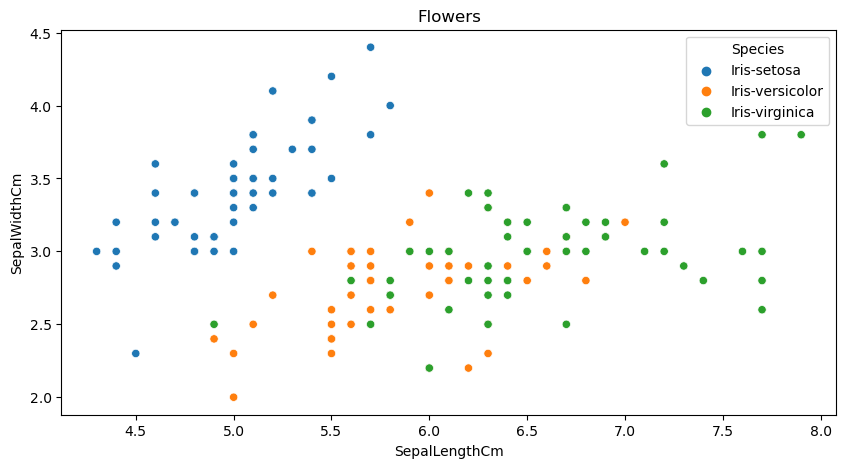

In [364]:
plt.figure(figsize=(10,5))
plt.title("Flowers")
sns.scatterplot(x=iris["SepalLengthCm"],y=iris["SepalWidthCm"],data=iris,hue="Species")

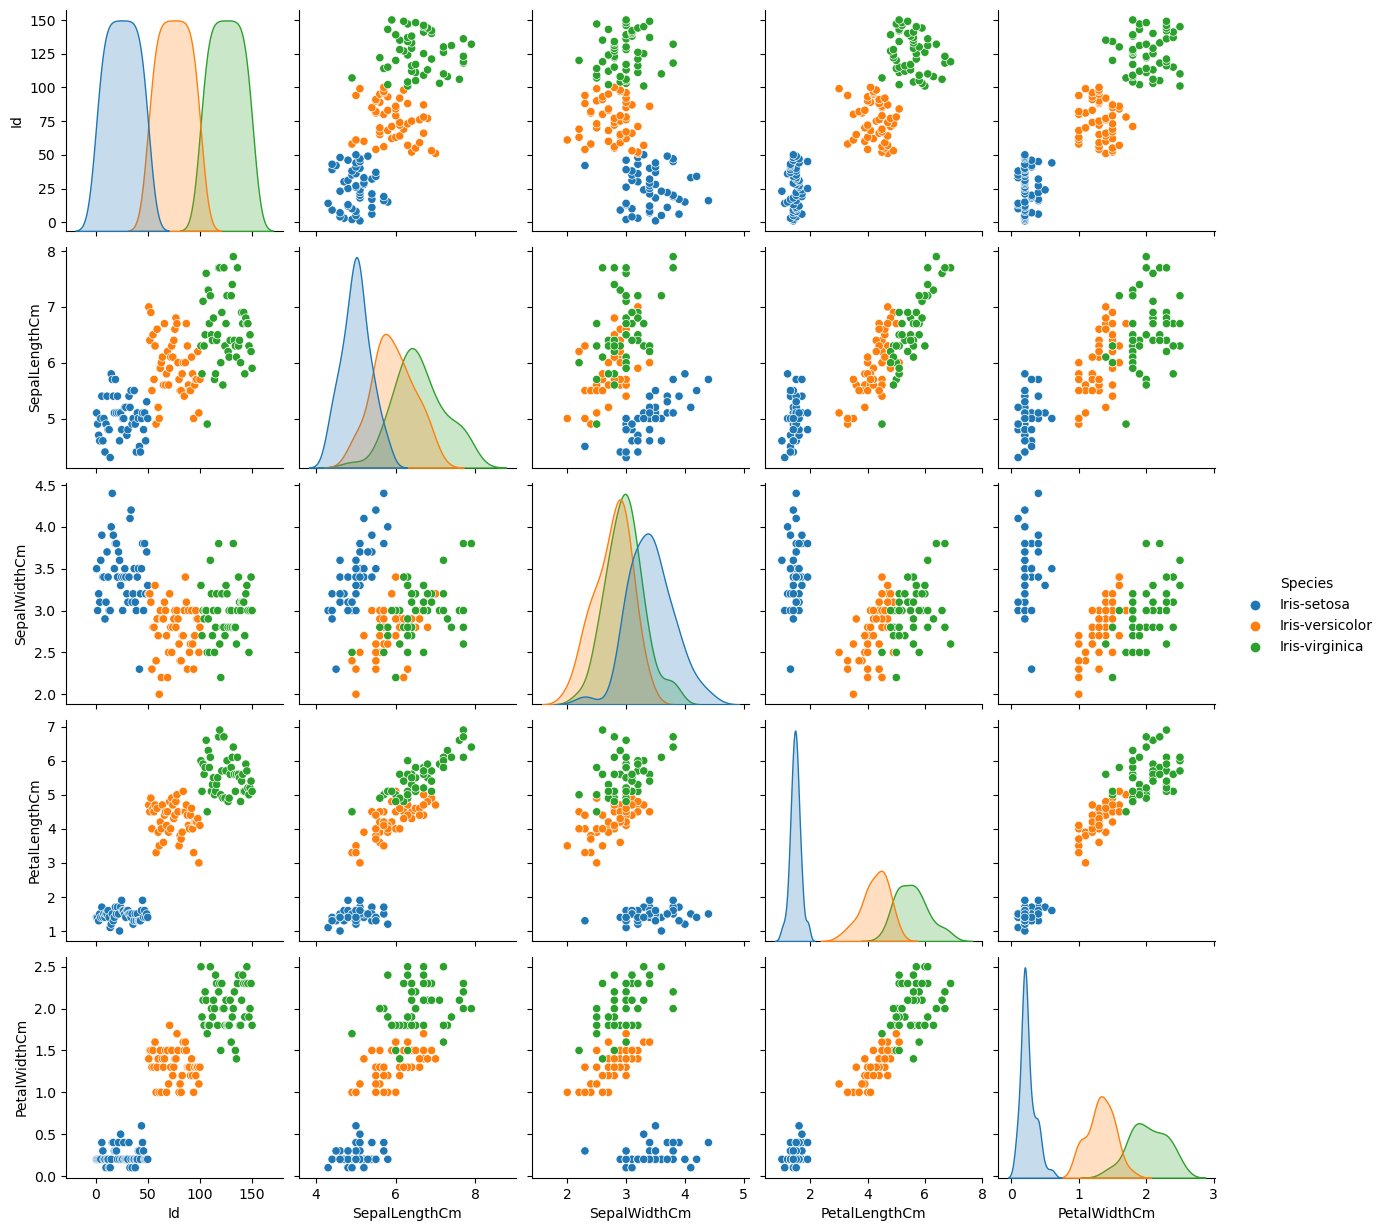

In [232]:
sns.pairplot(iris,hue="Species")

array([[<Axes: title={'center': 'Id'}, xlabel='[Species]'>,
        <Axes: title={'center': 'PetalLengthCm'}, xlabel='[Species]'>],
       [<Axes: title={'center': 'PetalWidthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'SepalLengthCm'}, xlabel='[Species]'>],
       [<Axes: title={'center': 'SepalWidthCm'}, xlabel='[Species]'>,
        <Axes: >]], dtype=object)

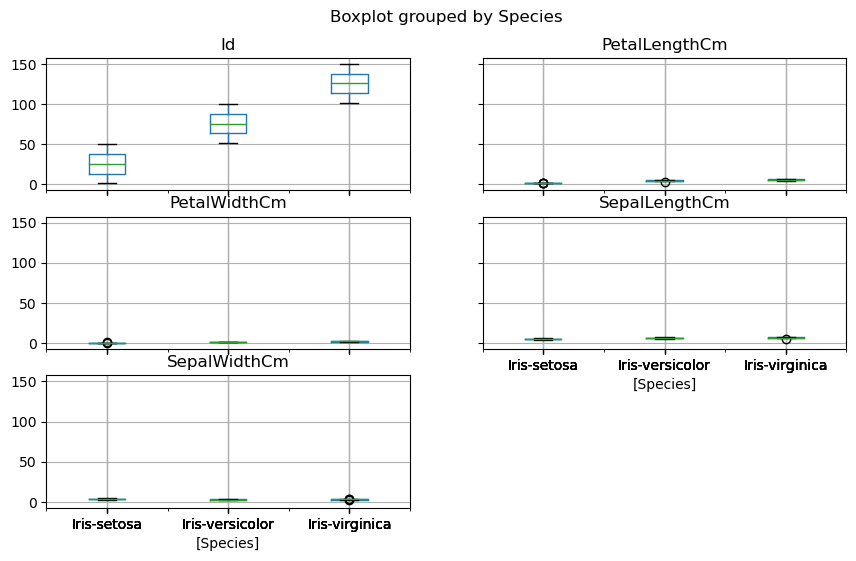

In [234]:
iris.boxplot(by='Species',figsize=(10,6))

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

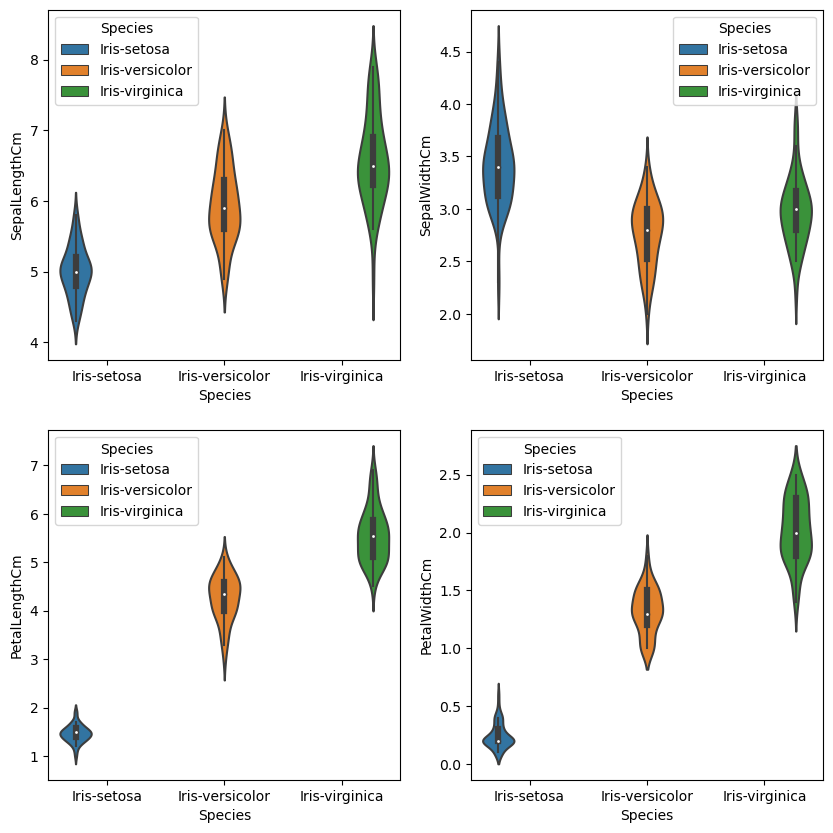

In [235]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.violinplot(x="Species",y="SepalLengthCm",data=iris,hue="Species")
plt.subplot(2,2,2)
sns.violinplot(x="Species",y="SepalWidthCm",data=iris,hue="Species")
plt.subplot(2,2,3)
sns.violinplot(x="Species",y="PetalLengthCm",data=iris,hue="Species")
plt.subplot(2,2,4)
sns.violinplot(x="Species",y="PetalWidthCm",data=iris,hue="Species")

In [3]:
corelation=iris.corr()
corelation

C:\Users\MSI\AppData\Local\Temp\ipykernel_2000\429758360.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corelation=iris.corr()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


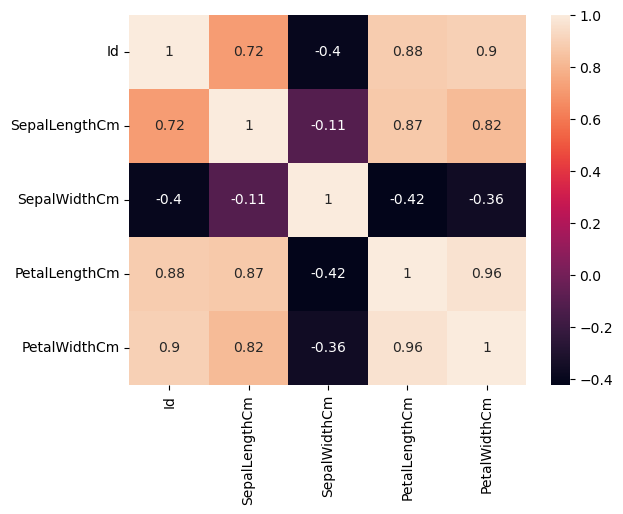

In [228]:
sns.heatmap(corelation,annot=True)
plt.show()

In [92]:
print(iris["SepalLengthCm"].max())
print(iris["SepalWidthCm"].max())
print(iris["PetalLengthCm"].max())
print(iris["PetalWidthCm"].max())

7.9
4.4
6.9
2.5


In [94]:
corelation

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [97]:
from pandas.plotting import andrews_curves

<Axes: >

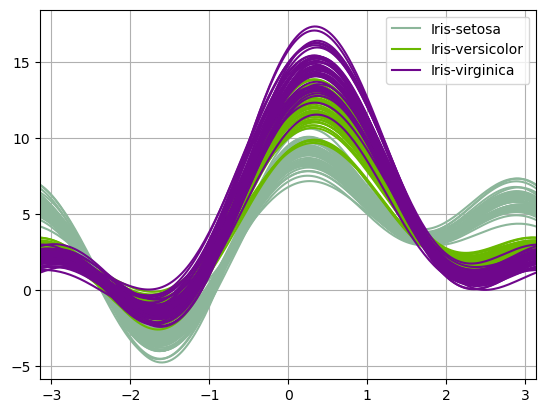

In [99]:
andrews_curves(iris.drop("Id",axis=1),"Species")

<b><h2>Training data</h2></b>

In [366]:
x=iris[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
y=iris["Species"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,test)

<h4><b>Logistic Regression</b></h4>

In [353]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()


In [354]:
lr.fit(x_train,y_train)

LogisticRegression()

In [355]:
print("Accuracy",lr.score(x_test,y_test))

Accuracy 0.9777777777777777


In [356]:
prediction =lr.predict(x_test)
expected=y_test
print(classification_report(expected,prediction))
print(confusion_matrix(expected,prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.94      1.00      0.97        16
 Iris-virginica       1.00      0.93      0.96        14

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

[[15  0  0]
 [ 0 16  0]
 [ 0  1 13]]


<h4><b>KNeighbors Classifier</b></h4>

In [357]:
from sklearn.neighbors import KNeighborsClassifier
lr=KNeighborsClassifier()

In [358]:
lr.fit(x_train,y_train)

KNeighborsClassifier()

In [359]:
print("Accuracy",lr.score(x_test,y_test))

Accuracy 1.0


<h4><b>Decision Tree Classifier</b></h4>

In [360]:
dt=DecisionTreeClassifier()


In [361]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [362]:
print("Accuracy",dt.score(x_test,y_test))

Accuracy 0.9333333333333333
